## Linear Regression 

We are often required to determine the relation between two variables, that is, how does changes in one variable ($x$) affect another variable ($y$). 

As a simple example, consider the deformation of a elastic band as you apply force. The following table describes those changes

| Force  (N)    | Deformation (cm)|
| ----------- | ----------- |
| 0     | 0      |
| 1  | 0.25     |
| 2  | 0.5 |
| 3  | 0.64 |
|4  | 0.81 |
|$\vdots$ | $\vdots$|
|20 | 4.00 |

Assume that you perform this experiment for different values of Force ($F$) and measure the resulting deformation with a simple ruler. The end results migh be something like this:

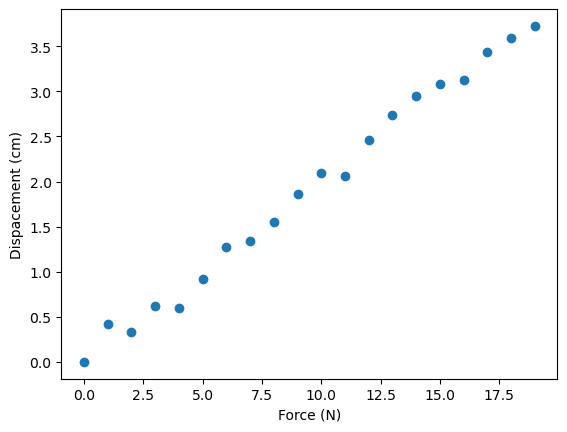

What if you want the displacement for a new value of force, say $10.5$ N. you did not record that data point in your original experiment, so you can either continue to record values of your variables to fill the missing values or perform an statistical analysis to determine the most likely relation between the variables. Linear regression allows you to determine that relation when the relation between variables is linear. 

In general, a linear model that relates two varibles can be written as

$$
y(x) = b + wx
$$

where parameters $b$ and $w$ are called the bias and weight, and the variables $y$ and $x$ are the dependent and independent variables respectively. By writting $y(x)$ were are stating the explicit dependency of $y$ on $x$. 

We can write this relation in vector notation as 
$$
\begin{bmatrix}
y[1] \\
y[2] \\
\vdots \\
y[n]
\end{bmatrix} = \begin{bmatrix}
1 & x[1] \\
1 & x[2] \\
\vdots & \vdots \\
1 & x[n]
\end{bmatrix}
\begin{bmatrix}
b \\
w 
\end{bmatrix}
$$

$$
\boldsymbol{y} = X \boldsymbol{w}
$$

with 
$$
\boldsymbol{y} = \begin{bmatrix}
y[1] \\
y[2] \\
\vdots \\
y[n]
\end{bmatrix}, \ 
X = \begin{bmatrix}
1 & x[1] \\
1 & x[2] \\
\vdots & \vdots \\
1 & x[n]
\end{bmatrix}, \ 
\boldsymbol{w} = \begin{bmatrix}
b \\
w 
\end{bmatrix}
$$
The goal of linear regression is to find the parameters $b$ and $w$ based on the measured data $x$ and $y$. 


### Least-Squares Regression 

Least-Squares regression is a form of linear regression based on the minimization of the squared error between measured values $y$ and values predicted with a linear model $\hat{y}$. In the least-squares paradigm, you propose a linear model and adjust its parameres ($b$ and $w$) such that the squared root of the squared sum of the difference between your predicted and measured values is as small as possible

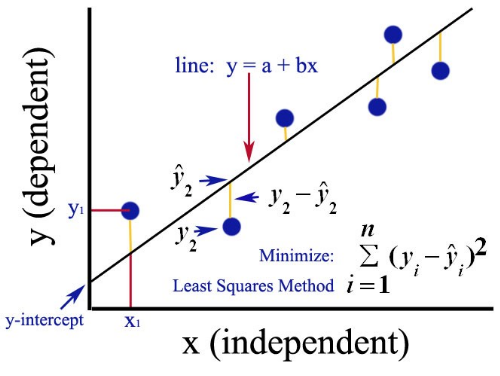

At the end, you want to find a linear combination of the columns of $X$ so that it is the closest to the vector $y$. In linear algebra jargon, we want to find a vector $\hat{y}$ that projects the vector $y$ into the column space of $X$. That will provide a new vector $\hat{y}$ that is formed by the columns of $X$ and is the closest possible to $y$. 

Because $\hat{y}$ is in the column space of $X$, then the vector form by $y-\hat{y}$ is perpendicular to the columns of $X$, meaning that the dot product between any column of $X$ and $y-\hat{y}$ is zero, that is

$$
X^{T}(y-\hat{y}) = 0
$$

now, according to our model, 
$$
\hat{y} = Xw
$$
so that

$$
X^{T}(y-Xw) = 0
$$
or
$$
X^{T}Xw = X^{T}y
$$

we are interested in finding the parameters $w$, we can do that using the previous equation 

$$
(X^{T}X)^{-1}(X^{T}X)w =(X^{T}X)^{-1}X^{T}y 
$$

and finally 

$$
w = (X^{T}X)^{-1}X^{T}y
$$

To summarize, this ecuation provides estimates to the parameters $b$ and $w$ that produce a new vector based on linear combinations of the columns of $X$ that is the closest to the measured data $y$.

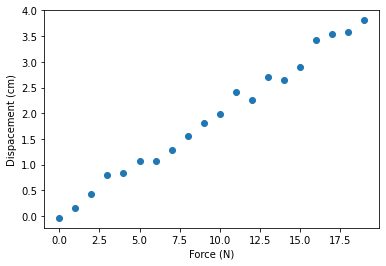

In [4]:
#Example

import numpy as np
import matplotlib.pyplot as plt
force = np.arange(0,20)
amount_of_noise = 0.1
displacement = force*(0.2) + amount_of_noise*np.random.randn(*force.shape)
plt.scatter(force,displacement)
plt.xlabel('Force (N)')
plt.ylabel('Dispacement (cm)')
plt.show()

In [12]:
X = np.column_stack((np.ones_like(force.T), force.T))
w_est = (np.linalg.inv(X.T@X)@X.T)@displacement

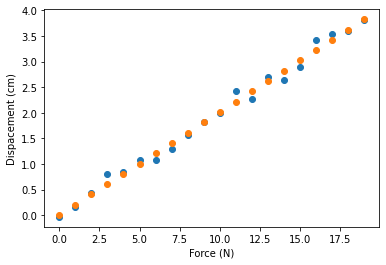

In [14]:
pred_displacement = X@w_est
plt.scatter(force,displacement)
plt.scatter(force, pred_displacement)
plt.xlabel('Force (N)')
plt.ylabel('Dispacement (cm)')
plt.show()

In [59]:
X = np.column_stack((np.ones_like(force.T), force.T))

XTX = np.linalg.inv(np.dot(X.T,X))
XTX_XT = np.dot(XTX, X.T)      

est_parameters = np.dot(XTX_XT, displacement)

print(est_parameters)

[-0.01648175  0.20262198]


#exercise (10% extra for assignment)

a- Repeat the same experiment but increase the amount of noise to i) 0.5 and ii) 1.0

b- Repeat the same experiment but modify the displacement equation to 

```python
displacement =  3 + force *(0.2) + amount_of_noise*np.random.randn(*force.shape)
```

c- Repeat the same experiment but modify the displacement equation to 

```python
force = np.arange(0,20)
resistance = np.power(np.arange(0,5,5/20),2)
displacement =  3 + force *(0.2) + resistance*0.1+ amount_of_noise*np.random.randn(*force.shape)

```



Modify the equation for the matrix X as needed. 


In [26]:
amount_of_noise = 1
force = np.arange(0,20)
resistance = np.power(np.arange(0,5,5/20),2)
displacement =  3 + force *(0.2) + resistance*0.1+ amount_of_noise*np.random.randn(*force.shape)


X = np.column_stack((np.ones_like(force.T), force.T, resistance.T))
w_est = (np.linalg.inv(X.T@X)@X.T)@displacement
print(w_est)

[3.57524712 0.16646025 0.11310666]


In [18]:
X

array([[ 1.    ,  0.    ,  0.    ],
       [ 1.    ,  1.    ,  0.0625],
       [ 1.    ,  2.    ,  0.25  ],
       [ 1.    ,  3.    ,  0.5625],
       [ 1.    ,  4.    ,  1.    ],
       [ 1.    ,  5.    ,  1.5625],
       [ 1.    ,  6.    ,  2.25  ],
       [ 1.    ,  7.    ,  3.0625],
       [ 1.    ,  8.    ,  4.    ],
       [ 1.    ,  9.    ,  5.0625],
       [ 1.    , 10.    ,  6.25  ],
       [ 1.    , 11.    ,  7.5625],
       [ 1.    , 12.    ,  9.    ],
       [ 1.    , 13.    , 10.5625],
       [ 1.    , 14.    , 12.25  ],
       [ 1.    , 15.    , 14.0625],
       [ 1.    , 16.    , 16.    ],
       [ 1.    , 17.    , 18.0625],
       [ 1.    , 18.    , 20.25  ],
       [ 1.    , 19.    , 22.5625]])